In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
DATASET_COLUMNS=['target','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/twitter.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head(5)

,target,text
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [ ]:
df.head()


,target,text
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [ ]:
df.columns


Index(['target', 'text'], dtype='object')

In [ ]:
print('length of data is', len(df))


length of data is 31962


In [ ]:
df. shape


(31962, 2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  31962 non-null  int64 
 1   text    31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [ ]:
df.dtypes


target     int64
text      object
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))


0

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   2
Count of rows in the data is:   31962


In [ ]:
df['target'].unique()


array([0, 1])

In [ ]:

df['target'].nunique()


2

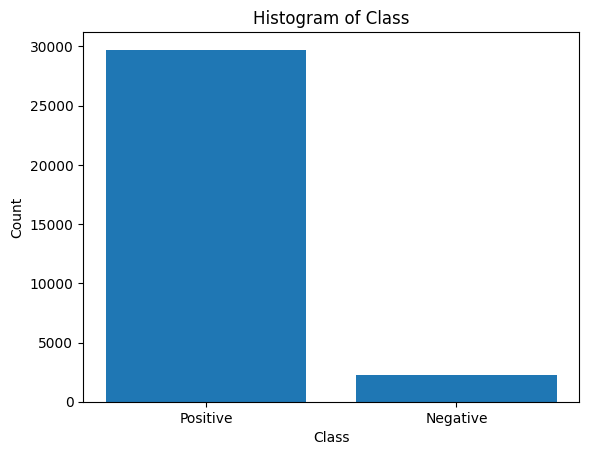

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'positive' and 'negative' are the labels for the classes
target = df['target']
counts = target.value_counts()

plt.bar(['Positive', 'Negative'], counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
# Separate features (text) and target (sentiment)
X = df['text']
y = df['target']

# Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Initialize SMOTE
smote = SMOTE()
# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Inverse transform the resampled data to text form
resampled_texts = vectorizer.inverse_transform(X_resampled)

# Map numerical sentiment labels back to text labels
label_mapping = {1: '1', 0: '0'}
y_resampled_text = [label_mapping[label] for label in y_resampled]

# Create DataFrame for resampled data
resampled_data = pd.DataFrame({'text': resampled_texts, 'target': y_resampled_text})

# Print the resampled data
print("Original data:")
print(df)

print("\nResampled data:")
print(resampled_data)


Original data:
       target                                               text
1           0   @user when a father is dysfunctional and is s...
2           0  @user @user thanks for #lyft credit i can't us...
3           0                                bihday your majesty
4           0  #model   i love u take with u all the time in ...
5           0             factsguide: society now    #motivation
...       ...                                                ...
31958       0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31959       0    to see nina turner on the airwaves trying to...
31960       0  listening to sad songs on a monday morning otw...
31961       1  @user #sikh #temple vandalised in in #calgary,...
31962       0                   thank you @user for you follow  

[31962 rows x 2 columns]

Resampled data:
                                                    text target
0      [run, dysfunction, into, kids, his, drags, he,...      0
1      [getthanked, disapointed, p

In [ ]:
def intoString(l):
  return ' '.join(l)

In [ ]:
resampled_data.iloc[:1,0:1]

,text
0,"[run, dysfunction, into, kids, his, drags, he,..."


In [ ]:
# Convert lists of words back into strings for each row
resampled_data['text'] = resampled_data['text'].apply(intoString)

# Print the resampled data with text converted into strings
print("Resampled data with text converted into strings:")
print(resampled_data)


Resampled data with text converted into strings:
                                                    text target
0      run dysfunction into kids his drags he selfish...      0
1      getthanked disapointed pdx in vans wheelchair ...      0
2                                    majesty your bihday      0
3               urã time the all with take love model in      0
4                      motivation now society factsguide      0
...                                                  ...    ...
59435  islam in amp unbelievable against racism chose...      1
59436  and easy bigot user your take to you re fuckin...      1
59437  and in over environmental injustice tyã pueori...      1
59438  the of change flight kkk derek user all school...      1
59439  with new uk anti israel criticism semitism val...      1

[59440 rows x 2 columns]


In [ ]:
# prompt: resample data into df

df = resampled_data


In [ ]:
df

,text,target
0,run dysfunction into kids his drags he selfish...,0
1,getthanked disapointed pdx in vans wheelchair ...,0
2,majesty your bihday,0
3,urã time the all with take love model in,0
4,motivation now society factsguide,0
...,...,...
59435,islam in amp unbelievable against racism chose...,1
59436,and easy bigot user your take to you re fuckin...,1
59437,and in over environmental injustice tyã pueori...,1
59438,the of change flight kkk derek user all school...,1


In [ ]:
df['target'].value_counts()

target
0    29720
1    29720
Name: count, dtype: int64

In [ ]:
df['target'] = df['target'].replace(4,1)


In [ ]:
df['target'].unique()


array(['0', '1'], dtype=object)

In [ ]:
df

,text,target
0,run dysfunction into kids his drags he selfish...,0
1,getthanked disapointed pdx in vans wheelchair ...,0
2,majesty your bihday,0
3,urã time the all with take love model in,0
4,motivation now society factsguide,0
...,...,...
59435,islam in amp unbelievable against racism chose...,1
59436,and easy bigot user your take to you re fuckin...,1
59437,and in over environmental injustice tyã pueori...,1
59438,the of change flight kkk derek user all school...,1


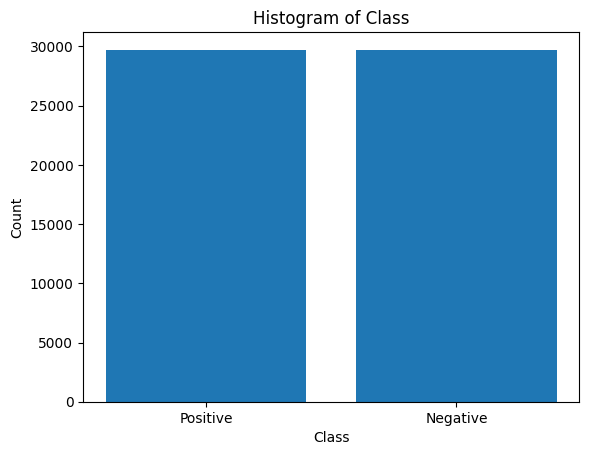

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'positive' and 'negative' are the labels for the classes
target = df['target']
counts = target.value_counts()

plt.bar(['Positive', 'Negative'], counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class')
plt.show()


In [ ]:
df.columns

Index(['text', 'target'], dtype='object')

In [ ]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
pip install nltk

In [ ]:
print(df.iloc[1][0])

getthanked disapointed pdx in vans wheelchair offer don they cause use can credit lyft for thanks user


In [ ]:
# prompt: remove the space between letters not between words

df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))


In [ ]:
df

,text,target
0,run dysfunction into kids his drags he selfish...,0
1,getthanked disapointed pdx in vans wheelchair ...,0
2,majesty your bihday,0
3,urã time the all with take love model in,0
4,motivation now society factsguide,0
...,...,...
59435,islam in amp unbelievable against racism chose...,1
59436,and easy bigot user your take to you re fuckin...,1
59437,and in over environmental injustice tyã pueori...,1
59438,the of change flight kkk derek user all school...,1


In [ ]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
df_stop_words = pd.DataFrame(stop_words, columns=["Stop Words"])
print(df_stop_words)


     Stop Words
0         which
1     somewhere
2           her
3      anywhere
4         still
..          ...
321       fifty
322  themselves
323         and
324      became
325    whenever

[326 rows x 1 columns]


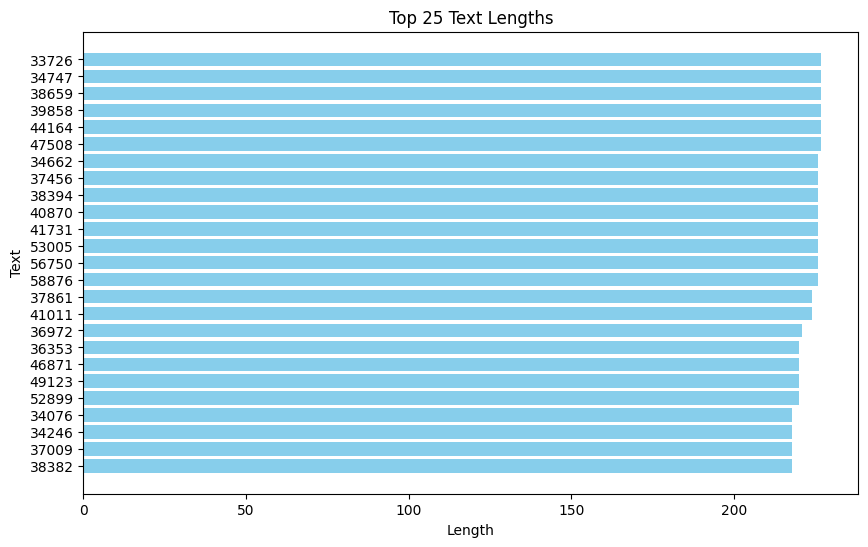

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['text_length'] = df['text'].apply(len)
top_25_lengths = df['text_length'].nlargest(25)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_25_lengths)), top_25_lengths.values, color='skyblue')
plt.yticks(range(len(top_25_lengths)), top_25_lengths.index)
plt.xlabel('Length')
plt.ylabel('Text')
plt.title('Top 25 Text Lengths')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest text at the top
plt.show()


In [ ]:
def worddrop(text) :
  text = text. lower()
  text = re. sub('\[.*?\]','', text)
  text = re. sub("\\W", " ", text)
  text = re. sub('https?://\S+|www. \S+','', text)
  text = re. sub('<.*?›+','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  return text

In [ ]:
import re
import string


data_copy = df.copy()

data_copy['text'] = data_copy['text'].apply(worddrop)


In [ ]:
data_copy

,text,target,text_length
0,run dysfunction into kids his drags he selfish...,0,87
1,getthanked disapointed pdx in vans wheelchair ...,0,102
2,majesty your bihday,0,19
3,urã time the all with take love model in,0,40
4,motivation now society factsguide,0,33
...,...,...,...
59435,islam in amp unbelievable against racism chose...,1,102
59436,and easy bigot user your take to you re fuckin...,1,107
59437,and in over environmental injustice tyã pueori...,1,171
59438,the of change flight kkk derek user all school...,1,126


In [ ]:
data_copy.columns
data_copy.shape

(59440, 3)

In [ ]:
import pandas as pd
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Customize spaCy's stopword list to remove "not"
stop_words = set(nlp.Defaults.stop_words)
nlp.Defaults.stop_words = stop_words

def remove_stopwords_spacy(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Generate a list of tokens that are not stop words
    filtered_text = [token.text for token in doc if token.text.lower() not in nlp.Defaults.stop_words]
    # Join the tokens back into a single string
    return " ".join(filtered_text)

if __name__ == "__main__":
    # Assuming 'data' is your DataFrame with columns ['text', 'class']

    # Create a new column 'clean_text' and apply remove_stopwords_spacy function to 'text' column
    p = data_copy['text'].apply(remove_stopwords_spacy)
    data_copy['text'] = ' '
    data_copy['text'] = p

    # Print the updated DataFrame
    print(data_copy)


                                                    text target  text_length
0      run dysfunction kids drags selfish dysfunction...      0           87
1      getthanked disapointed pdx vans wheelchair off...      0          102
2                                         majesty bihday      0           19
3                                    urã time love model      0           40
4                          motivation society factsguide      0           33
...                                                  ...    ...          ...
59435  islam amp unbelievable racism chosen humanity ...      1          102
59436  easy bigot user fucking ass russia disgrace bi...      1          107
59437  environmental injustice tyã pueorico inflame p...      1          171
59438  change flight kkk derek user school white blac...      1          126
59439  new uk anti israel criticism semitism valid go...      1          181

[59440 rows x 3 columns]


In [ ]:
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59440 entries, 0 to 59439
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         59440 non-null  object
 1   target       59440 non-null  object
 2   text_length  59440 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [ ]:
data_copy.describe()

,text_length
count,59440.000000
mean,90.657503
std,42.401943
min,0.000000
25%,59.000000
50%,84.000000
75%,117.000000
max,227.000000


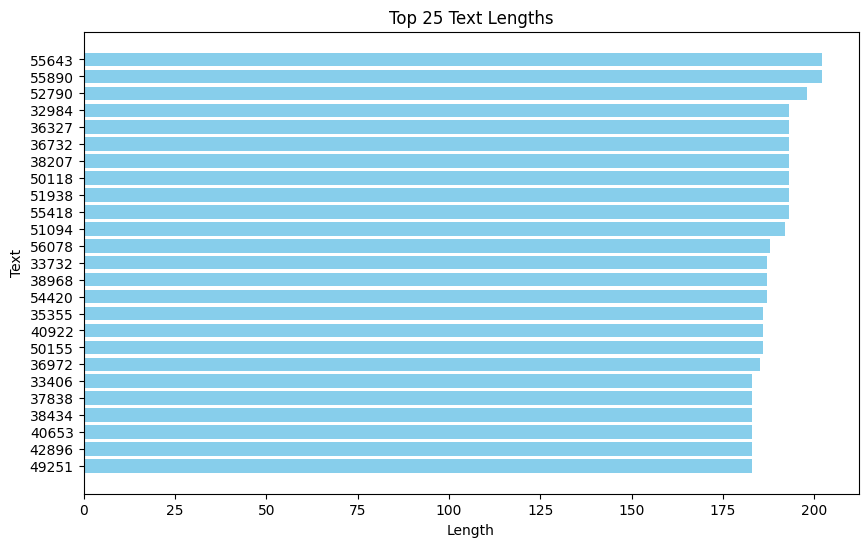

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_copy['text_length'] = data_copy['text'].apply(len)
top_25_lengths = data_copy['text_length'].nlargest(25)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_25_lengths)), top_25_lengths.values, color='skyblue')
plt.yticks(range(len(top_25_lengths)), top_25_lengths.index)
plt.xlabel('Length')
plt.ylabel('Text')
plt.title('Top 25 Text Lengths')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest text at the top
plt.show()


In [ ]:
data_copy.head()

,text,target,text_length
0,run dysfunction kids drags selfish dysfunction...,0,60
1,getthanked disapointed pdx vans wheelchair off...,0,86
2,majesty bihday,0,14
3,urã time love model,0,19
4,motivation society factsguide,0,29


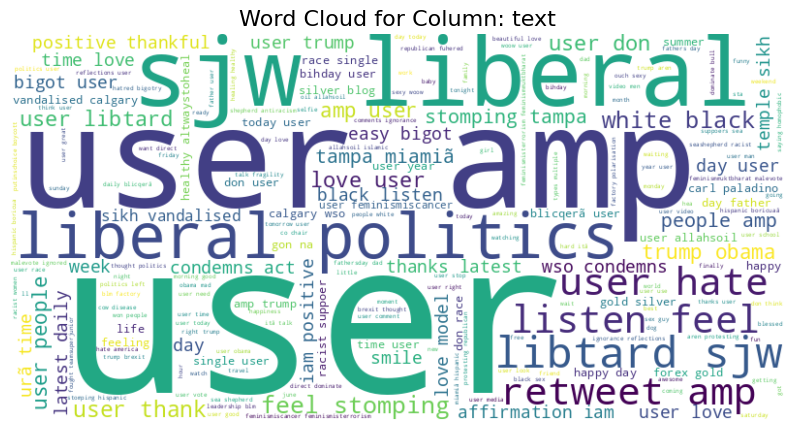

In [ ]:
# Install necessary libraries if you haven't already
# !pip install wordcloud matplotlib

# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word cloud for a given column
def generate_word_cloud(column):
    # Concatenate all text data in the specified column into a single string
    text = ' '.join(data_copy[column].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Column: {column}', fontsize=16)
    plt.axis('off')
    plt.show()

# Take input for column name
column_name = "text"

# Check if the column exists in the DataFrame
if column_name in data_copy.columns:
    generate_word_cloud(column_name)
else:
    print("Column not found in DataFrame.")


In [ ]:
x=data_copy['text']
y=data_copy['target']

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59435    1
59436    1
59437    1
59438    1
59439    1
Name: target, Length: 59440, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

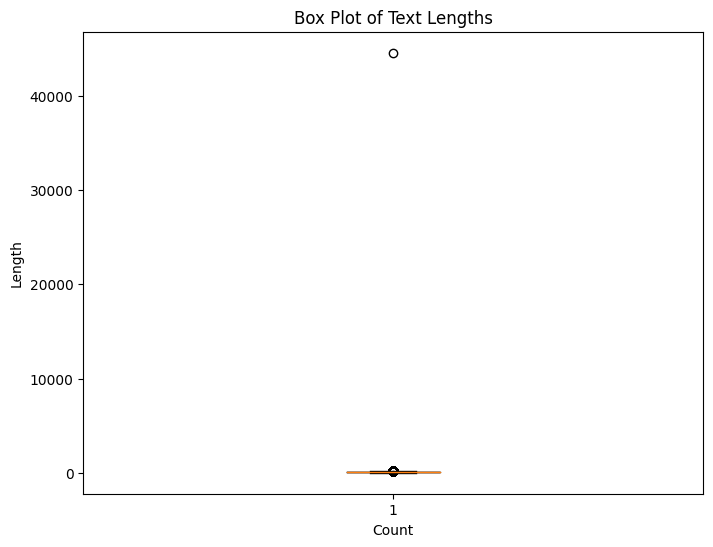

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x_train1=x_train.copy()
x_train1['text_length'] = x_train.apply(len)
all_lengths = []
for text in x_train1:
    length = len(text)
    all_lengths.append(length)

plt.figure(figsize=(8, 6))
plt.boxplot(all_lengths)
plt.xlabel('Count')
plt.ylabel('Length')
plt.title('Box Plot of Text Lengths')
plt.show()


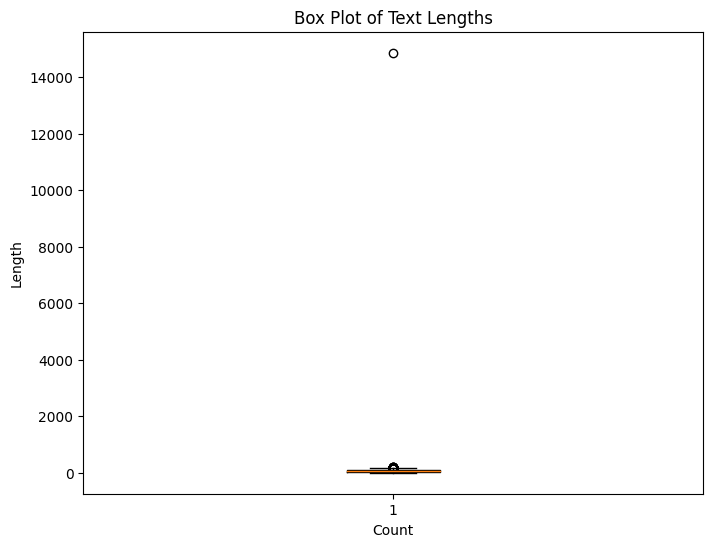

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x_test1=x_test.copy()
x_test1['text_length'] = x_test.apply(len)
all_lengths = []
for text in x_test1:
    length = len(text)
    all_lengths.append(length)

plt.figure(figsize=(8, 6))
plt.boxplot(all_lengths)
plt.xlabel('Count')
plt.ylabel('Length')
plt.title('Box Plot of Text Lengths')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
xv_train1 = tfidf.fit_transform(x_train)
xv_test1 = tfidf.transform(x_test)

In [ ]:
xv_train1

<44580x32635 sparse matrix of type '<class 'numpy.float64'>'
	with 422340 stored elements in Compressed Sparse Row format>

In [ ]:
data_copy['text']

0        run dysfunction kids drags selfish dysfunction...
1        getthanked disapointed pdx vans wheelchair off...
2                                           majesty bihday
3                                      urã time love model
4                            motivation society factsguide
                               ...                        
59435    islam amp unbelievable racism chosen humanity ...
59436    easy bigot user fucking ass russia disgrace bi...
59437    environmental injustice tyã pueorico inflame p...
59438    change flight kkk derek user school white blac...
59439    new uk anti israel criticism semitism valid go...
Name: text, Length: 59440, dtype: object

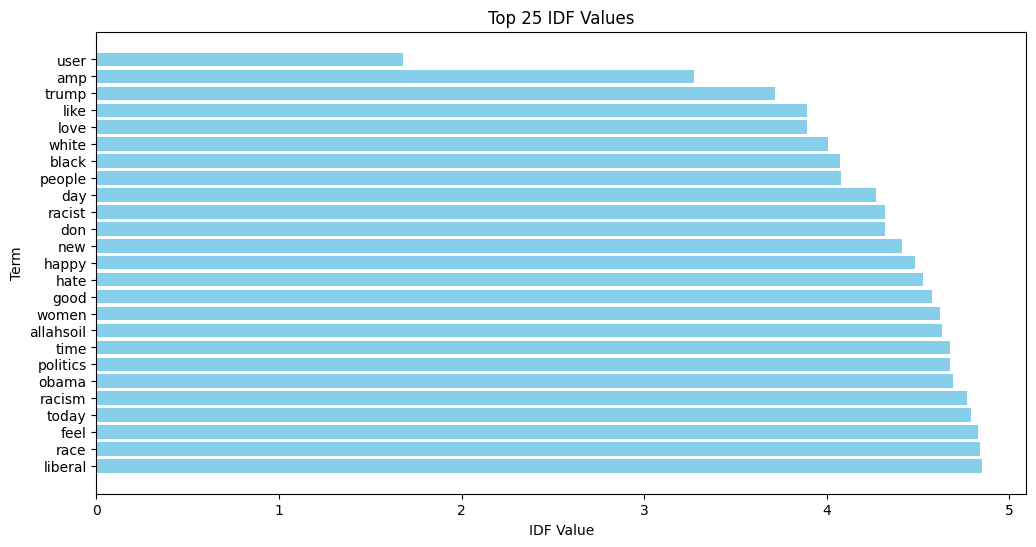

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data_copy['text'])
idf_values = tfidf.idf_
terms = tfidf.get_feature_names_out()
term_idf = dict(zip(terms, idf_values))
sorted_terms_idf = sorted(term_idf.items(), key=lambda x: x[1])

top_terms_idf = [term for term, score in sorted_terms_idf]
top_idf_values = [score for term, score in sorted_terms_idf]
plt.figure(figsize=(12, 6))
plt.barh(top_terms_idf[:25], top_idf_values[:25], color='skyblue')
plt.xlabel('IDF Value')
plt.ylabel('Term')
plt.title('Top 25 IDF Values')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(xv_train1,y_train)

LogisticRegression()

In [ ]:
pred_lr1=LR.predict(xv_test1)

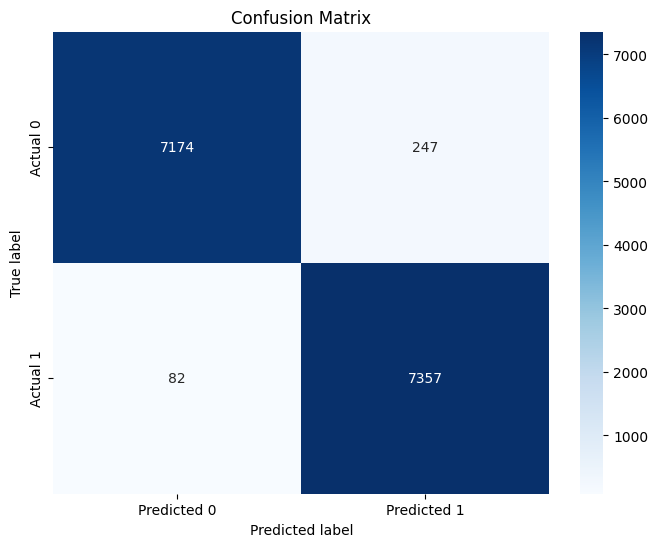

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(y_test)
predicted_labels = np.array(pred_lr1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
accuracy = LR.score(xv_test1, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9778600269179004


In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, pred_lr1)

# Print the classification report
print(report)
y_test_lr = y_test
y_pred_lr = pred_lr1

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7421
           1       0.97      0.99      0.98      7439

    accuracy                           0.98     14860
   macro avg       0.98      0.98      0.98     14860
weighted avg       0.98      0.98      0.98     14860



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 3))


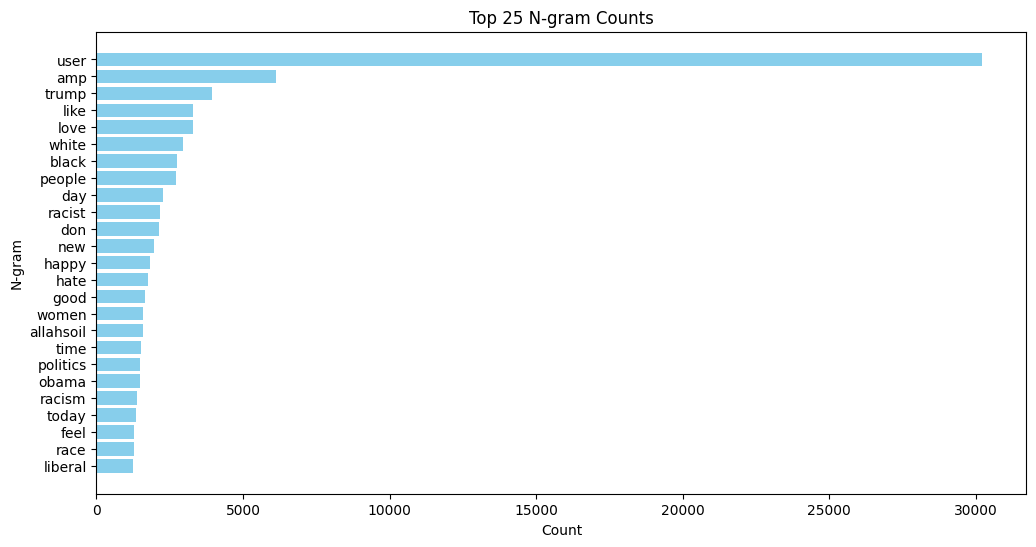

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming 'data_copy' is your DataFrame containing the 'text' column

# Initialize CountVectorizer with ngram_range=(1, 3)
count_vectorizer = CountVectorizer(ngram_range=(1, 3))

# Compute n-gram counts
ngrams_result = count_vectorizer.fit_transform(data_copy['text'])

# Get the feature names (n-grams)
ngrams = count_vectorizer.get_feature_names_out()

# Calculate the sum of counts for each n-gram
ngram_counts = ngrams_result.sum(axis=0).tolist()[0]

# Create a dictionary mapping n-grams to their counts
ngram_count_dict = dict(zip(ngrams, ngram_counts))

# Sort n-grams based on their counts
sorted_ngrams = sorted(ngram_count_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top n-grams and their counts
top_ngrams = [ngram for ngram, count in sorted_ngrams[:25]]
top_counts = [count for ngram, count in sorted_ngrams[:25]]

# Plot the n-gram counts
plt.figure(figsize=(12, 6))
plt.barh(top_ngrams, top_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.title('Top 25 N-gram Counts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()


In [ ]:
xv_train2 = count_vectorizer.fit_transform(x_train)
xv_test2 = count_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train2, y_train)

LogisticRegression()

In [ ]:
pred_lr2 = LR.predict(xv_test2)
accuracy = LR.score(xv_test2, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9821668909825033


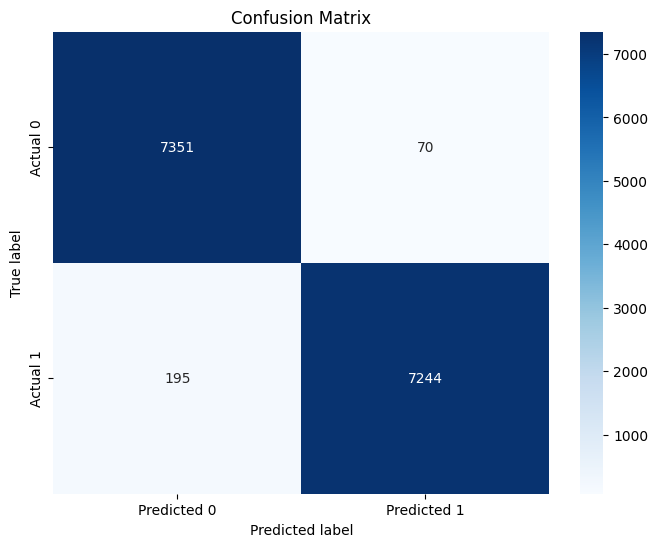

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(y_test)
predicted_labels = np.array(pred_lr2)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer instance and fit it on the training data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x_train)

# Transform the testing data using the same CountVectorizer instance
Y= vectorizer.transform(x_test)

# Apply LDA on the training data
lda = LatentDirichletAllocation(n_components=2, random_state=42)
xv_train3 = lda.fit_transform(X)

# Print the shape of the transformed data
print("Transformed Data shape:", xv_train3.shape)

# Transform the testing data using the trained LDA model
xv_test3 = lda.transform(Y)


Transformed Data shape: (44580, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train3, y_train)

LogisticRegression()

In [ ]:
pred_lr3 = LR.predict(xv_test3)
accuracy = LR.score(xv_test3, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.5949528936742934


LDA

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Assuming your DataFrame is named df and contains a column named "text"
# Example DataFrame:
# df = pd.DataFrame({'text': ['This is a sample sentence.', 'Another sentence.']})

# Download NLTK resources (only need to do this once)
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the text in the "text" column and store the tokenized text in a new column "tokenized_text"
data_copy['tokenized_text'] = data_copy['text'].apply(tokenize_text)

# Print the DataFrame with the new column
print(data_copy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                    text target  text_length  \
0      run dysfunction kids drags selfish dysfunction...      0           60   
1      getthanked disapointed pdx vans wheelchair off...      0           86   
2                                         majesty bihday      0           14   
3                                    urã time love model      0           19   
4                          motivation society factsguide      0           29   
...                                                  ...    ...          ...   
59435  islam amp unbelievable racism chosen humanity ...      1           91   
59436  easy bigot user fucking ass russia disgrace bi...      1           83   
59437  environmental injustice tyã pueorico inflame p...      1          136   
59438  change flight kkk derek user school white blac...      1           92   
59439  new uk anti israel criticism semitism valid go...      1          150   

                                       

In [ ]:
!pip install gensim


In [ ]:
import gensim
from sklearn.manifold import TSNE
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
import pandas as pd

# Assuming glove_model is your dictionary containing GloVe vectors
words = []
vectors = []
label=[]
class_array = np.array(data_copy['target'])
# Assuming data_copy is your DataFrame and tokenized_text is a column name
c=0
for token in data_copy['tokenized_text']:
    for word in token:
        if word in glove_model:
            words.append(word)
            label.append(class_array[c])
            vectors.append(glove_model[word])
    c+=1

# Create DataFrame after populating words and vectors
word_vector_df = pd.DataFrame({'word': words, 'vector': vectors,'label': label})


In [ ]:
word_vector_df

,word,vector,label
0,run,"[0.35216, 0.38333, 0.0468, 0.50003, 0.22831, 0...",0
1,dysfunction,"[0.085652, 0.28442, 0.51399, 0.2945, -0.15092,...",0
2,kids,"[-0.16475, 0.023265, 0.086147, 0.37598, -0.059...",0
3,drags,"[0.15459, -0.02819, 0.17474, 0.26569, 0.29201,...",0
4,selfish,"[0.060503, -0.33554, 0.38146, 0.19051, 0.94402...",0
...,...,...,...
482931,slander,"[-0.50462, -0.069554, -0.41444, -0.15289, -0.5...",1
482932,dictionary,"[-0.84041, -0.11159, 0.49872, 0.30307, -0.1933...",1
482933,english,"[-0.67433, -0.22641, 0.35998, 0.093677, -0.343...",1
482934,definition,"[-0.53503, 0.13696, 0.081696, 0.27703, -0.2096...",1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming words, vectors, and labels are already populated
# Assuming vectors is a list of word embeddings, and labels is a list of corresponding labels

# Convert vectors and labels lists to numpy arrays
X = np.array(vectors)
y = np.array(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7111235350147016


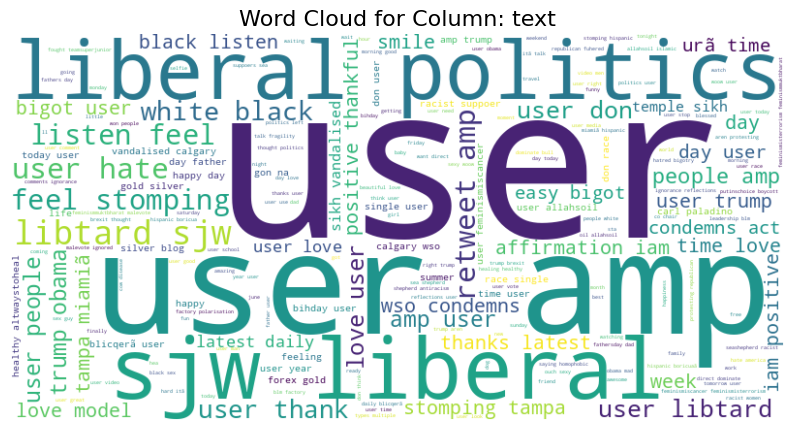

In [ ]:
# Install necessary libraries if you haven't already
# !pip install wordcloud matplotlib

# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word cloud for a given column
def generate_word_cloud(column):
    # Concatenate all text data in the specified column into a single string
    text = ' '.join(data_copy[column].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Column: {column}', fontsize=16)
    plt.axis('off')
    plt.show()

# Take input for column name
column_name = "text"

# Check if the column exists in the DataFrame
if column_name in data_copy.columns:
    generate_word_cloud(column_name)
else:
    print("Column not found in DataFrame.")


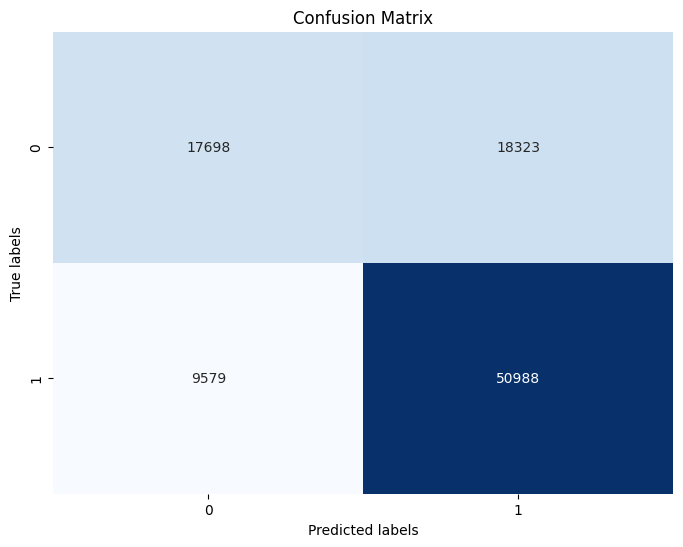

In [ ]:
# Draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Xgboost

In [ ]:

import pandas as pd

# Assuming your DataFrame is named 'df' and the column you want to change is named 'target'
df['target'] = df['target'].replace({'1': 1, '0': 0}).astype(int)

# Print the DataFrame to verify the changes
print(df)
x=data_copy['text']
y=data_copy['target']

                                                    text  target  text_length
0      run dysfunction into kids his drags he selfish...       0           87
1      getthanked disapointed pdx in vans wheelchair ...       0          102
2                                    majesty your bihday       0           19
3               urã time the all with take love model in       0           40
4                      motivation now society factsguide       0           33
...                                                  ...     ...          ...
59435  islam in amp unbelievable against racism chose...       1          102
59436  and easy bigot user your take to you re fuckin...       1          107
59437  and in over environmental injustice tyã pueori...       1          171
59438  the of change flight kkk derek user all school...       1          126
59439  with new uk anti israel criticism semitism val...       1          181

[59440 rows x 3 columns]


Accuracy: 0.9433041722745625
Precision: 0.9665147265077139
Recall: 0.9194462975316878
F1 Score: 0.9423931623931625
Confusion Matrix:
[[5701  191]
 [ 483 5513]]


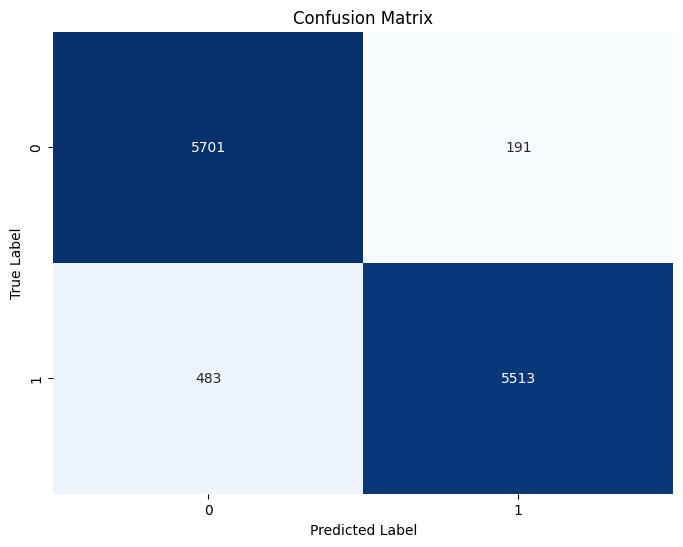

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'x' is your feature data and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_test_xg = y_test
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_count = count_vectorizer.transform(X_test)

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_count, y_train)

# Predict
y_pred = model.predict(X_test_count)
y_pred = y_pred.astype(int)
y_pred_xg2 = y_pred
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5892
           1       0.97      0.92      0.94      5996

    accuracy                           0.94     11888
   macro avg       0.94      0.94      0.94     11888
weighted avg       0.94      0.94      0.94     11888



In [ ]:
# Convert target variable to integer type


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming X contains your features and y contains your target labels

# Convert X_train and X_test to pandas Series or list of strings
X_train_texts = [str(x) for x in X_train]
X_test_texts = [str(x) for x in X_test]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)

y_test = y_test.astype(int)
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_texts).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_texts).toarray()

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)
y_pred = y_pred.astype(int)
y_pred_xg1 = y_pred
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9386776581426649


In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5892
           1       0.95      0.92      0.94      5996

    accuracy                           0.94     11888
   macro avg       0.94      0.94      0.94     11888
weighted avg       0.94      0.94      0.94     11888



Random Forest

In [ ]:
x = data_copy['text']
y = data_copy['target']

Accuracy on test data with Random Forest: 0.9858008075370122


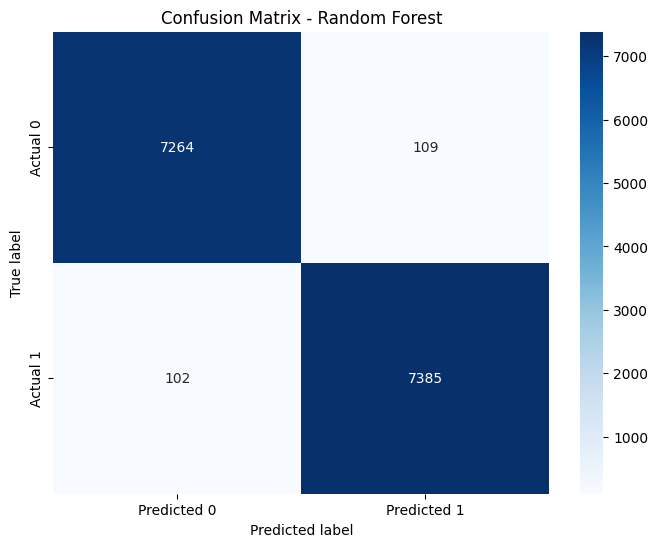

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x contains your text data and y contains corresponding labels

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_test_rf = y_test
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit TF-IDF vectorizer and transform train data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform test data using the fitted vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initialize Random Forest classifier
RF = RandomForestClassifier()

# Train the model
RF.fit(x_train_tfidf, y_train)

# Make predictions on test data
pred_rf = RF.predict(x_test_tfidf)
pred_rf = pred_rf.astype(int)
y_pred_rf = pred_rf
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy on test data with Random Forest:", accuracy_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, pred_rf)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7373
           1       0.99      0.99      0.99      7487

    accuracy                           0.99     14860
   macro avg       0.99      0.99      0.99     14860
weighted avg       0.99      0.99      0.99     14860



Accuracy on test data with Random Forest and CountVectorizer: 0.9869448183041722


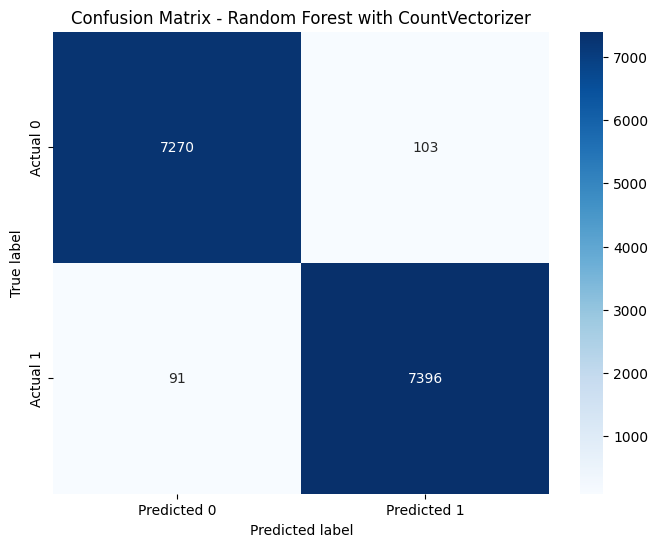

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit CountVectorizer and transform train data
x_train_count = count_vectorizer.fit_transform(x_train)

# Transform test data using the fitted vectorizer
x_test_count = count_vectorizer.transform(x_test)

# Initialize Random Forest classifier
RF_count = RandomForestClassifier()

# Train the model
RF_count.fit(x_train_count, y_train)

# Make predictions on test data
pred_rf_count = RF_count.predict(x_test_count)

# Calculate accuracy
accuracy_rf_count = accuracy_score(y_test, pred_rf_count)
print("Accuracy on test data with Random Forest and CountVectorizer:", accuracy_rf_count)

# Compute confusion matrix
cm_rf_count = confusion_matrix(y_test, pred_rf_count)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_count, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest with CountVectorizer')
plt.show()


In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, pred_rf)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7373
           1       0.99      0.99      0.99      7487

    accuracy                           0.99     14860
   macro avg       0.99      0.99      0.99     14860
weighted avg       0.99      0.99      0.99     14860



In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


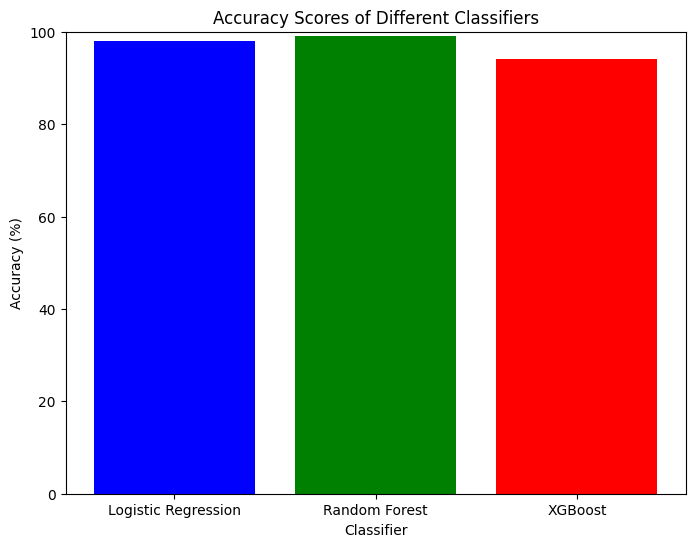

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
classifiers = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [98, 99, 94]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Setting y-axis limit
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

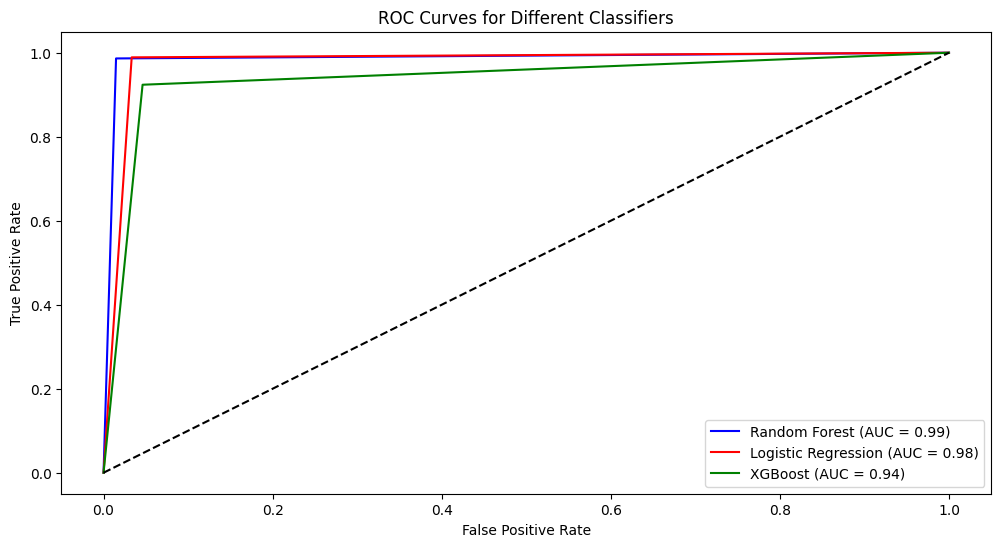

In [ ]:
# prompt: draw the roc curve on three models

import matplotlib.pyplot as plt
# Assuming you have the following data:

# - y_test_rf: True labels for Random Forest predictions
# - pred_rf_proba: Predicted probabilities for Random Forest
# - y_test_lr: True labels for Logistic Regression predictions
# - pred_lr_proba: Predicted probabilities for Logistic Regression
# - y_test_xgb: True labels for XGBoost predictions
# - pred_xgb_proba: Predicted probabilities for XGBoost

# Calculate ROC curves and AUC for each model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
y_test_lr = y_test_lr.astype(int)
y_pred_lr = y_pred_lr.astype(int)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_lr, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xg, y_pred_xg1)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(12, 6))

plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='red', label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_xgb, tpr_xgb, color='green', label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.show()


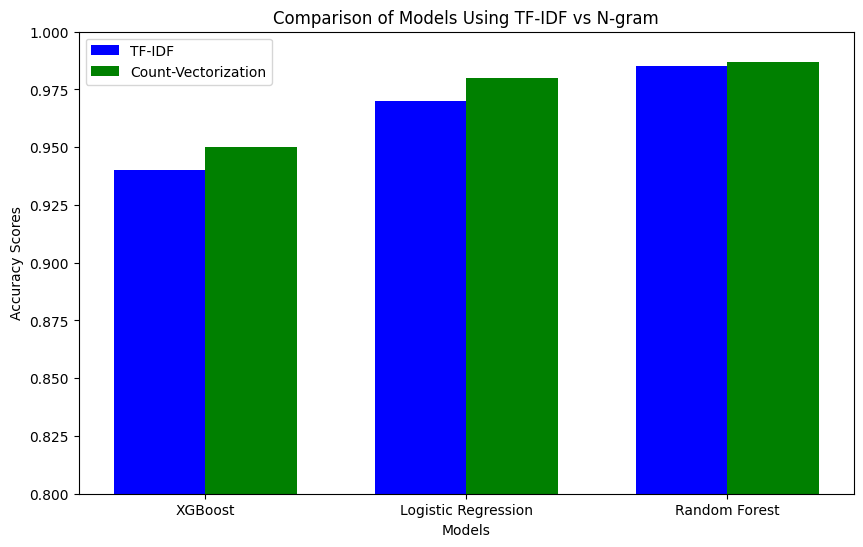

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores for each model with TF-IDF and N-gram
logistic_regression_tfidf_accuracy = 0.97
logistic_regression_ngram_accuracy = 0.98

xgboost_tfidf_accuracy = 0.94
xgboost_ngram_accuracy = 0.95

random_forest_tfidf_accuracy = 0.985
random_forest_ngram_accuracy = 0.987

# Create lists for models and accuracy scores
models = [ 'XGBoost','Logistic Regression', 'Random Forest']
tfidf_accuracies = [xgboost_tfidf_accuracy, logistic_regression_tfidf_accuracy,  random_forest_tfidf_accuracy]
ngram_accuracies = [xgboost_ngram_accuracy, logistic_regression_ngram_accuracy, random_forest_ngram_accuracy]

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Create bar graph for model comparison
plt.bar(r1, tfidf_accuracies, color='blue', width=bar_width, label='TF-IDF')
plt.bar(r2, ngram_accuracies, color='green', width=bar_width, label='Count-Vectorization')

plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Comparison of Models Using TF-IDF vs N-gram')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.ylim(0.8, 1.0)  # Adjust ylim if needed
plt.legend()
plt.show()
